

 _Face Recognition_

## 1. Task description

The provided dataset includes face images of 40 subjects. There are a total of 400 images, with 10 images per subject. Each image contains 32×32=1024 pixels, with 256 grey levels per pixel.

## 2. Preparation

### 2.1 Setting up

The functions that you need are defined in the source file we have provided you with. To use them you must import it first:

In [1]:
from lab3lib import load_data, show_single_face, show_faces, partition_data, split_left_right, join_left_right, show_split_faces
import numpy as np
import matplotlib.pyplot as plt


Now you can load the data:

In [2]:
data, labels = load_data()

### 2.2 Visualising the dataset

You can observe the faces stored in a data matrix by using the functions `show_single_face()` and `show_faces()`.

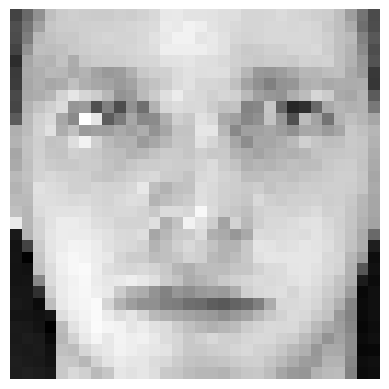

In [3]:
# Display a single example.
show_single_face(data[0, :])

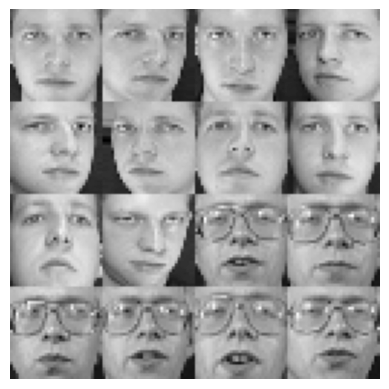

In [4]:
# Display the first 16 examples in a 4x4 grid.
show_faces(data[:16, :], num_per_row=4)

### 2.3 Splitting into the train and test sets

Firstly normalizing the pixel values by 1/255 so that the feature values used in later experiments are between $[0,1]$. In general, the normalization trick can make it easier for your to tune parameters in machine learning experiments.

A data partition function is supplied to facilitate the experiments. It randomly splits the provided data into the training and test sets, where the training set contains $N$ samples per class and the test set contains
the remaining samples. The function takes the labels and the specified number $N$ as the input. And returns the sample indices in the training and test set. For example, the following code divides a given set of 400 samples into a training set containing 3 samples per subject and a test set containing 7 samples per subject:

In [5]:
# normalization
data = data / 255

# partition
tr_ind, te_ind = partition_data(labels, num_per_class=3)
tr_data = data[tr_ind, :]
# print(tr_data)
tr_label = labels[tr_ind]
te_data = data[te_ind, :]
te_label = labels[te_ind]

## 3. $L_2$-regularised least squares
### 3.1 Implementation

`l2_rls_train` trains a linear model by minimising the $L_2$-regularised sum of squares loss through zeroing the loss gradient. It should support both single-output and multi-output cases. This function should take a set of training samples and a user-specified regularisation parameter $\lambda$ (lambda) as the input, and return the predicted weights. When $\lambda=0$, use a pseudo-inverse to implement the solution.

In [6]:
def l2_rls_train(data, labels,lmbd): 
    
    # labelling the training data and the labels 
    X, y = data, labels
    
    # Expand X with a column of ones.
    X_tilde = np.hstack((np.ones((data.shape[0],1)),X))
    
    # Compute the coefficient vector.
    if lmbd == 0 :
        w = np.linalg.pinv(X_tilde) @ y
    elif lmbd > 0:
        Identity_Matrix = np.eye(X_tilde.shape[1])
        X_tilde_transpose = np.transpose(X_tilde)
        w = np.linalg.inv(X_tilde_transpose @ X_tilde + lmbd*Identity_Matrix) @ (X_tilde_transpose) @ (y)     
    # Return model parameters.
    return w

Implementing the function `l2_rls_predict` below. It takes the trained weights and your query data as the input, and return the corresponding prediction.

In [7]:
print(l2_rls_train(tr_data, tr_label,0.03))

[18.22710291  0.03036726 -1.91751026 ... -3.6612361   2.93668501
  0.97802056]


In [8]:
def l2_rls_predict(w, data):   
    X = data 
    X_tilde = np.hstack((np.ones((data.shape[0],1)),X))
    # Compute the prediction.  
    predicted_y = X_tilde @ w
        
    return predicted_y

In [9]:
y_pred = l2_rls_predict(l2_rls_train(tr_data, tr_label,0.03),tr_data)
print(y_pred)

[ 0.9743185   1.11852615  1.22788165  2.04075733  1.89174178  2.27753459
  3.26185115  3.12878998  3.12369284  4.16198706  4.13868892  3.99411272
  5.27089661  5.29934054  5.04220226  6.42300671  6.19847284  6.09045047
  7.09936787  7.13982004  7.07788699  8.20798314  8.03203986  8.00729604
  9.14074848  9.18615519  9.14497133  9.99070618  9.93107521 10.08924165
 11.12020649 11.08849902 11.06107292 12.03242732 12.0096036  12.025291
 13.13463148 13.16477502 12.9698263  13.9693119  13.95392725 13.98500482
 15.05843668 14.86304019 15.31084427 16.06133895 15.88079146 15.99772853
 16.99728549 17.06225701 17.0535849  17.99308755 18.0916538  17.93508429
 18.99512947 19.0906708  18.88297129 19.89919506 20.05134596 19.87868807
 21.24817075 20.97154886 20.89153378 22.02419795 21.96596224 22.02177975
 23.03848524 22.84441452 22.84069726 23.75067168 24.12382128 23.87927594
 25.18402523 24.97318331 25.03747153 25.94940622 25.95125111 25.94288053
 26.97978389 26.75562443 26.95403025 27.94277454 28.0



### 3.2 Report

A report has been published that explains briefly the knowledge supporting the implementation and my design step by step. I have commented on the role of any arguments that I have added to your functions. 

## 4. Face Recognition 
### 4.1 Implementation and experiment design

In this project phase, I implemented a multi-class classifier for subject identification using 40 subjects. The dataset was split into a training set (5 random images per subject) and a test set.

A machine learning experiment was designed with three stages:

**Training**: The multi-class classifier was trained using the training set.

**Hyperparameter Selection**: $\lambda$ was tuned using approaches like random subsampling, k-fold cross-validation, and leave-one-out cross-validation.

**Evaluation**: Classifier performance was assessed on the test set, with a 40x40 confusion matrix generated to analyze misclassifications.

The code implementation ensures the classifier functions effectively across all subjects and is available for review.

In [10]:
# # Your code goes here
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold

tr_ind, te_ind = partition_data(labels, num_per_class=5)
tr_data = data[tr_ind, :]
tr_label = labels[tr_ind]
te_data = data[te_ind, :]
te_label = labels[te_ind]


#setting possible values for lambda
lmd_vals = [0, 0.001, 0.01, 0.02, 0.03, 0.1, 0.2, 0.3, 1, 3, 3, 4, 5, 6, 7, 8, 9 , 10, 100, 1000]


# #Using K-fold CV from SK learn 

k_splits = 10

# Encode the categorical labels using one-hot encoding
encoder = OneHotEncoder(sparse=False)
tr_label_encoded = encoder.fit_transform(tr_label.reshape(-1, 1))
# print(tr_label_encoded)

# Initialize variables for storing results
confusion_matrix_all = np.zeros((40, 40))
avg_acc = 0

# Use k-fold cross-validation to select the best lambda value
best_lambda = None
best_acc = 0
kf = KFold(n_splits=k_splits, shuffle=True)
for lmd_val in lmd_vals:
    avg_acc_lmd = 0
    for train_index, val_index in kf.split(tr_data):
        tr_data_kf, tr_label_kf = tr_data[train_index], tr_label_encoded[train_index]
        val_data_kf, val_label_kf = tr_data[val_index], tr_label_encoded[val_index]
        
        # Train the model using L2-regularized least squares
        w = l2_rls_train(tr_data_kf, tr_label_kf, lmd_val)
        
        # Evaluate the model on the validation set
        val_pred = l2_rls_predict(w, val_data_kf)
        val_acc = accuracy_score(np.argmax(val_pred, axis=1), np.argmax(val_label_kf, axis=1))
        avg_acc_lmd += val_acc / k_splits
    
    # Select the lambda value with the highest average accuracy on the validation sets
    if avg_acc_lmd > best_acc:
        best_acc = avg_acc_lmd
        best_lambda = lmd_val
    
    print(f"Lambda = {lmd_val:.3f}, avg. Training accuracy = {avg_acc_lmd:.3f}")
print(f"Best lambda value: {best_lambda:.3f},Training accuracy = {best_acc:.3f}")
# print(f"Lambda = {best_lambda:.3f},Training accuracy = {best_acc:.3f}")
print(f"Average accuracy: {avg_acc_lmd:.3f}")

# Train the model using the selected lambda value and all training data
w = l2_rls_train(tr_data, tr_label_encoded, best_lambda)

# Evaluate the model on the test set
te_pred = l2_rls_predict(w, te_data)
# print(te_pred)
te_acc = accuracy_score(np.argmax(te_pred, axis=1)+1, te_label)
# print(np.argmax(te_pred, axis=1)+1)
# print(te_label)
# avg_acc += te_acc 

# Compute the confusion matrix for the test set
confusion_matrix_all += confusion_matrix(te_label, np.argmax(te_pred, axis=1), labels=np.arange(40))

print(f"Test accuracy: {te_acc:.3f}")
print("Confusion matrix:")
print(confusion_matrix_all)



C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Lambda = 0.000, avg. Training accuracy = 0.895
Lambda = 0.001, avg. Training accuracy = 0.865
Lambda = 0.010, avg. Training accuracy = 0.885
Lambda = 0.020, avg. Training accuracy = 0.870
Lambda = 0.030, avg. Training accuracy = 0.885
Lambda = 0.100, avg. Training accuracy = 0.890
Lambda = 0.200, avg. Training accuracy = 0.885
Lambda = 0.300, avg. Training accuracy = 0.895
Lambda = 1.000, avg. Training accuracy = 0.890
Lambda = 3.000, avg. Training accuracy = 0.895
Lambda = 3.000, avg. Training accuracy = 0.880
Lambda = 4.000, avg. Training accuracy = 0.885
Lambda = 5.000, avg. Training accuracy = 0.865
Lambda = 6.000, avg. Training accuracy = 0.885
Lambda = 7.000, avg. Training accuracy = 0.835
Lambda = 8.000, avg. Training accuracy = 0.865
Lambda = 9.000, avg. Training accuracy = 0.865
Lambda = 10.000, avg. Training accuracy = 0.865
Lambda = 100.000, avg. Training accuracy = 0.780
Lambda = 1000.000, avg. Training accuracy = 0.350
Best lambda value: 0.000,Training accuracy = 0.895
Ave

 Pick some subjects that are considered the easist to recognise by your classifier, and print the test images from these subjects below.

C:\Users\DELL\AppData\Local\Temp\ipykernel_10084\4078944183.py:4: RuntimeWarning: invalid value encountered in divide
  row_acc = confusion_matrix_all.diagonal() / confusion_matrix_all.sum(axis=1)


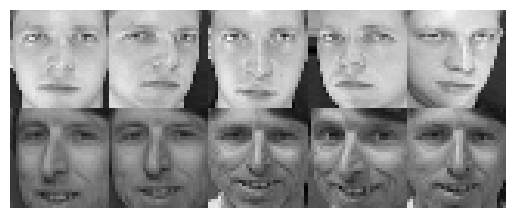

In [11]:
# Your code goes here

# Find the row with the highest accuracy in the confusion matrix
row_acc = confusion_matrix_all.diagonal() / confusion_matrix_all.sum(axis=1)
easiest_subjects = np.argsort(row_acc)[-2:] + 1 # Select the 2 easiest subjects

# Extract the test examples corresponding to the easiest subjects
easiest_data = te_data[np.isin(te_label, easiest_subjects)]
easiest_label = te_label[np.isin(te_label, easiest_subjects)]

# Display the first 16 examples in a 4x4 grid
show_faces(easiest_data[:16, :], num_per_row=5)


 Pick some subjects that are considered the most difficult to recognise by your classifier, and print the misclassified test images from these subjects below.

Most difficult subjects: [ 0 22 23 24 25]


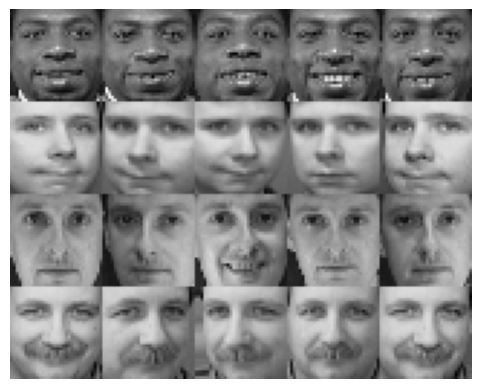

In [12]:
# Find the subjects with the lowest values on the diagonal of the confusion matrix
most_difficult_subjects = np.argsort(np.diag(confusion_matrix_all))[:5]
print(f"Most difficult subjects: {most_difficult_subjects}")

# Select the misclassified test images that belong to these subjects
selected_images = te_data[np.isin(te_label, most_difficult_subjects) & (te_label != np.argmax(te_pred, axis=1))]

# Display the misclassified test images from the most difficult subjects
show_faces(selected_images, num_per_row=5)


### 4.2 Report

Explanation of the classification steps, and report your chosen hyper-parameter and results on the test set are documented on the report. Initial results reveal variations in classification accuracy across subjects, requiring further analysis to identify influencing factors.

## 5. Face Completion
Here we predict the 512 pixels of the right face from the 512 pixels of the left face by formulating a regression task.
The following command can be used to extract the left and right faces from the input data.

In [13]:
# Split data into left and right faces
left, right = split_left_right(data)

We cab visualise them with the function `show_split_faces()`:

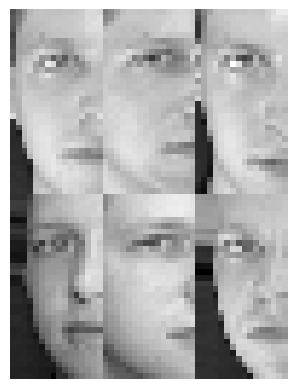

In [14]:
show_split_faces(left[:6, :], num_per_row=3)

### 5.1 Implementation and experiment design

Building a face completion model using the regularised least squares model. Designing an experiment to assess your model, which includes appropriate training and testing. Mean absolute percentage error (MAPE) is used to evaluate the regression performance. Here we are not bothered with hyper-parameter selection and simply set $\lambda$=0.

In [15]:
# # Your code goes here
from sklearn.metrics import mean_absolute_percentage_error

#implementation 2

# normalization
left, right = split_left_right(data)

# partition
tr_ind, te_ind = partition_data(labels, num_per_class=2)
#for training 
tr_data = left[tr_ind, :]
tr_label = right[tr_ind]
#for testing 
te_data = left[te_ind, :]
te_label = right[te_ind]

# alculating the weight using the left and right pixels partitioned for training 
w = l2_rls_train(tr_data,tr_label, 0)

# making prediction using the unseen left pixels
right_pred = l2_rls_predict(w, te_data)

# mape = mean_absolute_percentage_error(te_label, right_pred)
# print(mape)

# calculating the mape 
mape = np.mean(np.abs((te_label - right_pred) /te_label)) 
print("MAPE:" ,mape)
print(f"MAPE: {mape * 100:.3f}%")

MAPE: 0.20732319668732
MAPE: 20.732%


Visualising and comparing the ground truth face (include both the left and right parts) and the completed face (include both the true left and predicted right parts) for 3 randomly chosen testing samples below. We use `join_left_right(left, right)` to concatenate the left and right halves of a set of faces.

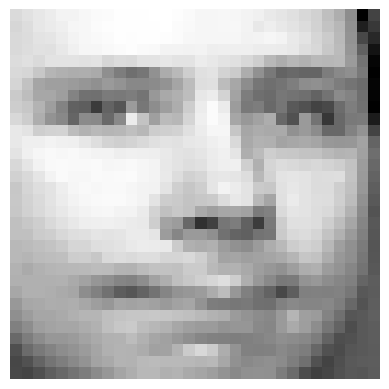

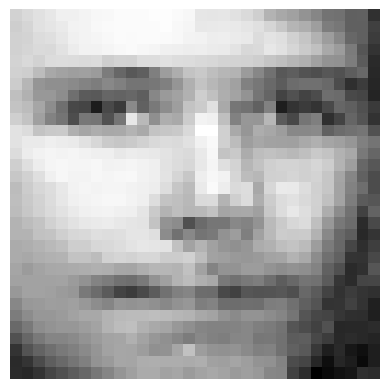

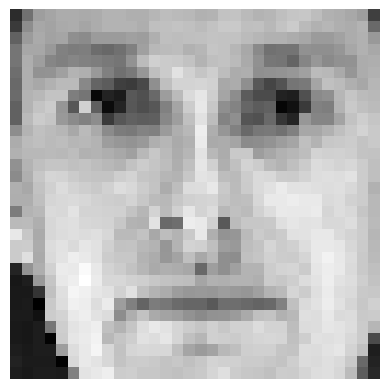

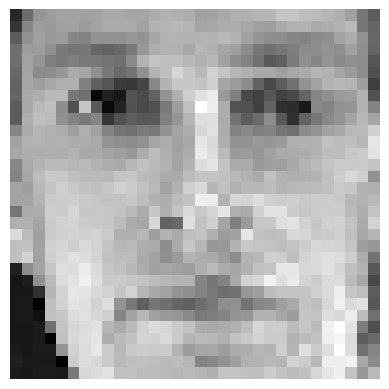

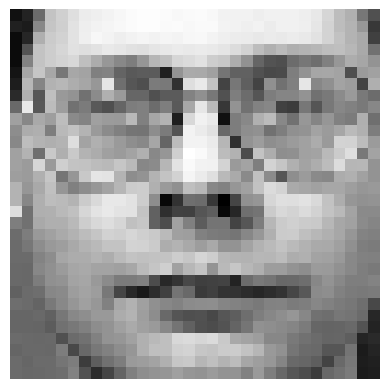

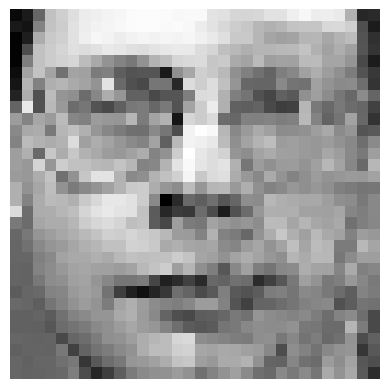

In [16]:
from random import randint

for i in range(3):
    rand_val = randint(0, 199)
    show_single_face(join_left_right(te_data, te_label)[rand_val,:])
    show_single_face(join_left_right(te_data, right_pred)[rand_val,:])


### 5.2 Report

We report the MAPE and make some observations regarding the results of the face completion model. How well has your model performed? Offering one suggestion for how it can be improved.


## 6. Training linear least squares model via gradient descent 
For these experiments we perform **binary classification.** 
### 6.1 GD Implementation
Now, implement the function `lls_gd_train` below. 

`lls_gd_train` trains a single-output linear model by minimising the sum of squares loss using the gradient descent approach. It should take the iteration number $N$ and the learning rate $\eta$ as the input. To keep things simple, you can fix the initial guess of the model weights $\mathbf{w}$ as zeros. It should record and return the weights and costs of linear least squares model calculated in all the iterations.

In [17]:
def lls_gd_train(data, labels, N, eta):
    # This is just to be consistent with the lecture notes.
    X, y = data, labels

    # Expand X with a column of ones.
    X_tilde = np.hstack((np.ones((data.shape[0],1)),X))

    # Weight initialization
    w = np.zeros(X_tilde.shape[1])
#     print(w)

    # Initialise arrays to store weights and cost at each iteration
    w_all = []
    cost_all = []


    # GD update of weights
    for i in range(N):
        #implementation 1
        
        # cost and error
        error = y - np.dot(X_tilde, w)        
        cost = np.sum(error ** 2)/(2 * len(y))
        
        #gradient
        term_1 = X_tilde.T @ X_tilde @ w
        term_2 = X_tilde.T @ y
        gradient = (term_1 - term_2)/len(y)

        # Weight update
        w = w - eta * gradient
        #print(w)


        # save w and cost of each iteration in w_all and cost_all
        w_all.append(w)
        cost_all.append(cost)

    # Return model parameters.
    return cost_all, w_all

### 6.2 Experiments

Apply this function to classify images from subject 1 and subject 30. You only need to conduct the experiment for one training-test trial, where 3 images from each subject are used for training and the remaining 7 images for testing.

Set your learning rate small, e.g., $\eta=10^{-3}$, and use a reasonable iteration number, e.g., $N=200$, to train your model. Plot in three figures (1) the change of your sum-of-squares error loss that you minimise, (2) the change of the classification accuracy for training samples, and (3) the change of the classification accuracy for test samples over iterations. Write your code below and make sure it runs. 

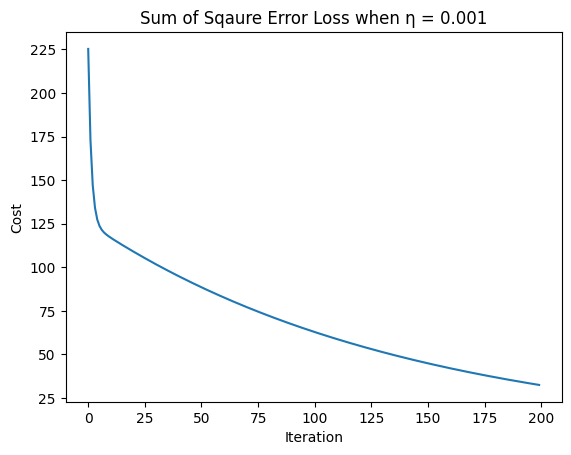

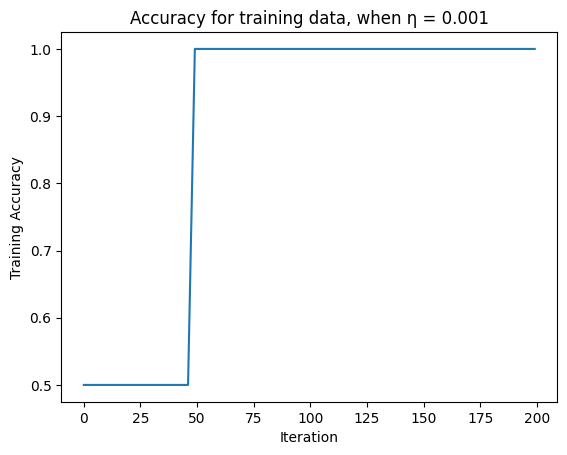

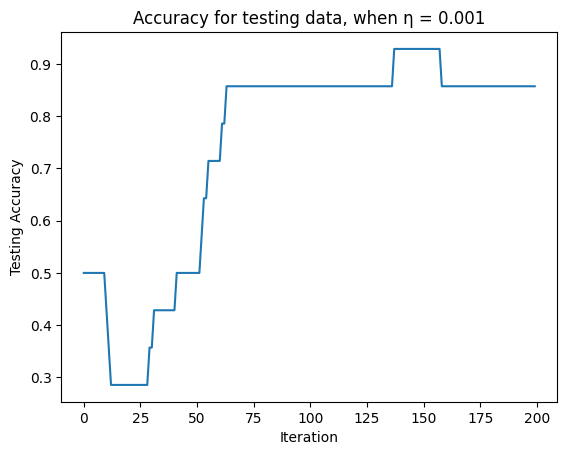

In [115]:
# partition
tr, te = partition_data(labels, num_per_class=3)

#getting the indices for 1's and 30's from the training set
tr_ind_sample1 = tr[0:3]
tr_ind_sample30 = tr[87:90]

#getting the final training indices which has the indices for both sample 1 and sample 30.
tr_ind = np.concatenate((tr_ind_sample1,tr_ind_sample30))

#splitting training data and label
tr_data = data[tr_ind, :]
tr_label = labels[tr_ind]

#getting the indices for 1's and 30's from the testing set
te_ind_sample1 = te[0:7]
te_ind_sample30 = te[203:210]

#getting the final testing indices which has the indices for both sample 1 and sample 30.
te_ind = np.concatenate((te_ind_sample1,te_ind_sample30))

#splitting testing data and label
te_data = data[te_ind, :]
te_label = labels[te_ind]


N = 200
eta = 0.001
#setting a threshold value of 15.5 for binary classification 
threshold = 15.5
train_acc_all = []
test_acc_all = []
cost_all, w_all = lls_gd_train(tr_data, tr_label, N, eta)


for i in range(len(w_all)):   
    X_tilde  = np.hstack((np.ones((tr_data.shape[0],1)),tr_data))
    term = np.dot(X_tilde, w_all[i])
    cond = term < threshold
    pred = np.where(cond ,1 , 30)
    tr_acc = np.sum(pred == tr_label)/len(tr_label)
    train_acc_all.append(tr_acc)


for i in range(len(w_all)): 
    X_tilde  = np.hstack((np.ones((te_data.shape[0],1)),te_data))
    term = np.dot(X_tilde, w_all[i])
    cond = term < threshold
    pred = np.where(cond , 1 , 30)
    te_acc = np.sum(pred == te_label)/len(te_label)
    test_acc_all.append(te_acc)

# Plotting results

# Plot sum-of-squares error loss
plt.plot(cost_all)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Sum of Sqaure Error Loss when η = 0.001')
plt.show()
    
plt.plot(train_acc_all)
plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.title('Accuracy for training data, when η = 0.001')
plt.show()

plt.plot(test_acc_all)
plt.xlabel('Iteration')
plt.ylabel('Testing Accuracy')
plt.title('Accuracy for testing data, when η = 0.001')
plt.show()
   






Try a larger learning rate, e.g., $\eta=10^{-2}$, and produce the same three plots by training the model for $N=200$ iterations. Write your code below and make sure it runs. 

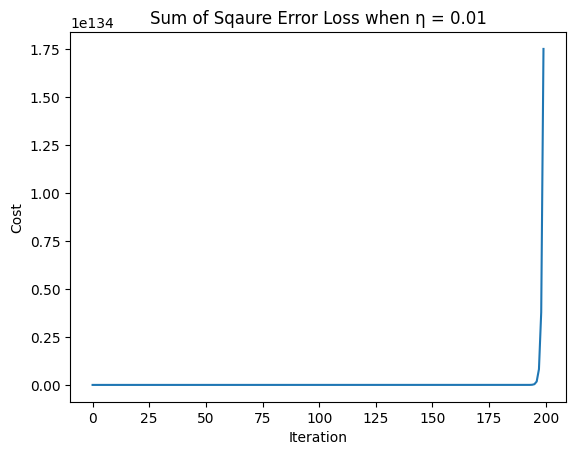

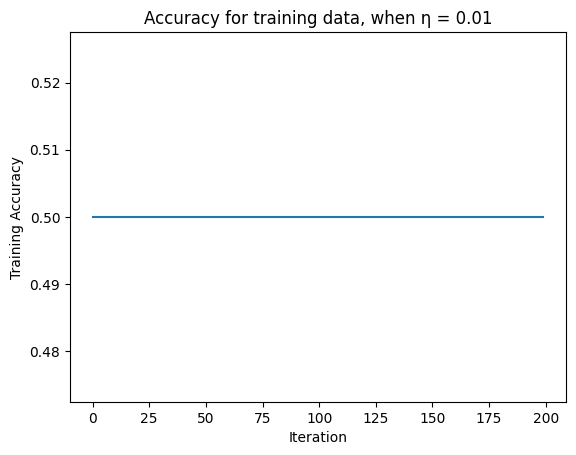

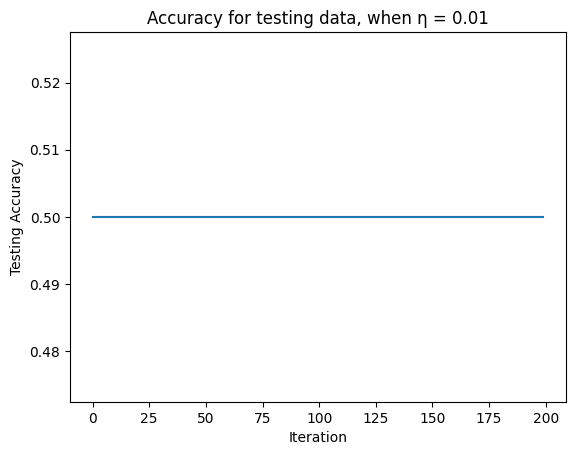

In [116]:

# partition
tr, te = partition_data(labels, num_per_class=3)

#getting the indices for 1's and 30's from the training set
tr_ind_sample1 = tr[0:3]
tr_ind_sample30 = tr[87:90]

#getting the final training indices which has the indices for both sample 1 and sample 30.
tr_ind = np.concatenate((tr_ind_sample1,tr_ind_sample30))

#splitting training data and label
tr_data = data[tr_ind, :]
tr_label = labels[tr_ind]

#getting the indices for 1's and 30's from the testing set
te_ind_sample1 = te[0:7]
te_ind_sample30 = te[203:210]

#getting the final testing indices which has the indices for both sample 1 and sample 30.
te_ind = np.concatenate((te_ind_sample1,te_ind_sample30))

#splitting testing data and label
te_data = data[te_ind, :]
te_label = labels[te_ind]


N = 200
eta = 0.01
#setting a threshold value of 15.5 for binary classification 
threshold = 15.5
train_acc_all = []
test_acc_all = []
cost_all, w_all = lls_gd_train(tr_data, tr_label, N, eta)


for i in range(len(w_all)):  
    X_tilde  = np.hstack((np.ones((tr_data.shape[0],1)),tr_data))
    term = np.dot(X_tilde, w_all[i])
    cond = term < threshold
    pred = np.where(cond ,1 , 30)
    tr_acc = np.sum(pred == tr_label)/len(tr_label)
    train_acc_all.append(tr_acc)


for i in range(len(w_all)): 
    X_tilde  = np.hstack((np.ones((te_data.shape[0],1)),te_data))
    term = np.dot(X_tilde, w_all[i])
    cond = term < threshold
    pred = np.where(cond , 1 , 30)
    te_acc = np.sum(pred == te_label)/len(te_label)
    test_acc_all.append(te_acc)

# Plotting results

# Plot sum-of-squares error loss
plt.plot(cost_all)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Sum of Sqaure Error Loss when η = 0.01')
plt.show()
    
plt.plot(train_acc_all)
plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.title('Accuracy for training data, when η = 0.01')
plt.show()

plt.plot(test_acc_all)
plt.xlabel('Iteration')
plt.ylabel('Testing Accuracy')
plt.title('Accuracy for testing data, when η = 0.01')
plt.show()
   






### 6.3 Report
Analyse the impact that changing the learning rate has on the cost function and obtained testing accuracies over each iteration in experiment 6.2. Drawing from what you observed in your experiments, what are the consequences of setting the learning rate and iteration number too high or too low?

## 7. Advanced Gradient-based Training
For this section, you may choose to implement **either Option 1: SGD** (4 marks), or **Option 2: GD with hinge loss** (7 marks). 

*Please note: Option 1 is easier, but gives fewer potential marks. Option 2 is designed to be a steep challenge, potentially involves mathematical derivations not shown in your notes, and will be marked rigorously. Choose wisely!*

### Option 1: Compare with stochastic gradient descent training (4 marks, Normal)
### 7.1 SGD Implementation 
Replace the gradient descent approach that you did in Section 4 with a stochastic gradient descent approach. Your new implementation can be named as `lls_sgd_train`. You can adopt a similar implementation template to that of your `lls_gd_train` function.

In [167]:
import numpy as np

def lls_sgd_train(data, labels, N, eta):

    # This is just to be consistent with the lecture notes.
    X, y = data, labels

    # Expand X with a column of ones.
    X_tilde = np.hstack((np.ones((X.shape[0],1)),X))

    # Weight initialization
    w = np.zeros(X_tilde.shape[1])

    # Initialise arrays to store weights and cost at each iteration
    w_all = np.zeros((N, X_tilde.shape[1]))
    cost_all = np.zeros((N))

    # SGD update of weights
    for i in range(N):

        # cost and stochastic gradient descent of the linear least squares model
        index = np.random.choice(X_tilde.shape[0], replace=True)
        x_i , y_i = X_tilde[index], y[index]
        
        y_pred = np.dot(x_i, w)
        error = y_i - y_pred
        cost = np.sum(error ** 2) / 2
        
        term_1 = np.dot(x_i.T, np.dot(x_i, w))
        term_2 = np.dot(x_i.T, y_i)
        gradient =  (term_1 - term_2)/2

        # Weight update
        w = w - (eta * gradient)

        # save w and cost of each iteration in w_all and cost_all 
        w_all[i] = w
        cost_all[i] = cost

    # Return model parameters.
    return cost_all, w_all


### 7.2 Experiment Design
Design and implement an appropriate experiment to demonstrate the performance and behaviour difference between gradient descent and stochastic gradient descent. 


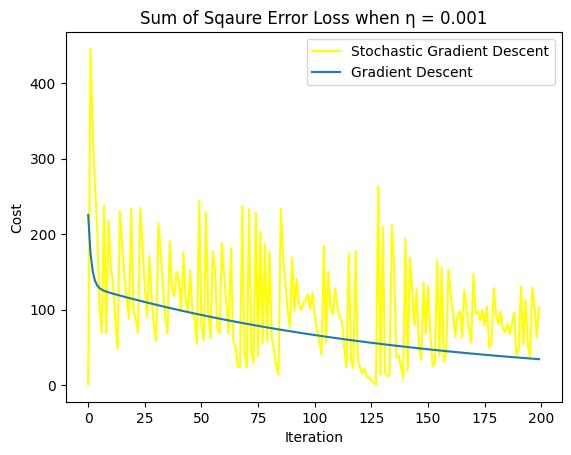

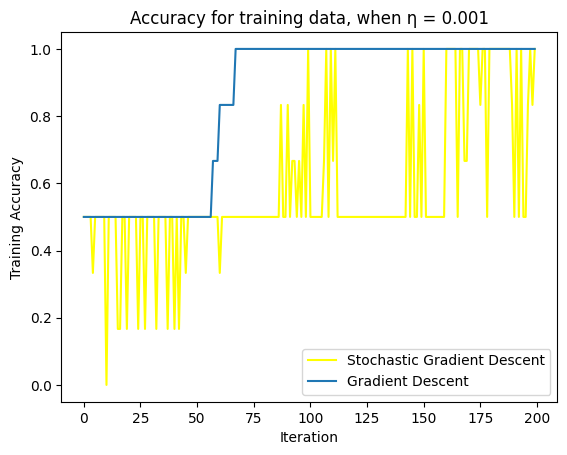

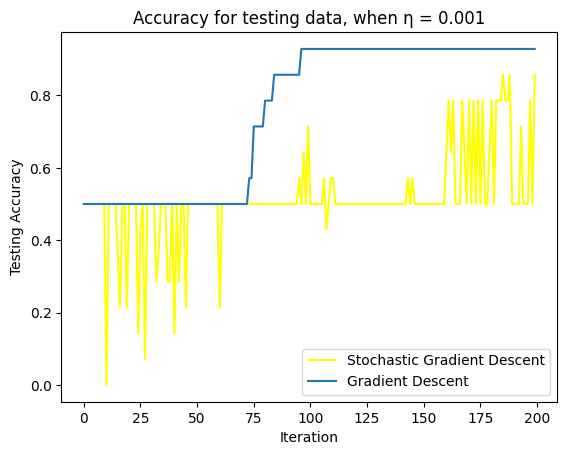

In [169]:

# partition
tr, te = partition_data(labels, num_per_class=3)

#getting the indices for 1's and 30's from the training set
tr_ind_sample1 = tr[0:3]
tr_ind_sample30 = tr[87:90]

#getting the final training indices which has the indices for both sample 1 and sample 30.
tr_ind = np.concatenate((tr_ind_sample1,tr_ind_sample30))

tr_data = data[tr_ind, :]
tr_label = labels[tr_ind]

#getting the indices for 1's and 30's from the testing set
te_ind_sample1 = te[0:7]
te_ind_sample30 = te[203:210]

#getting the final testing indices which has the indices for both sample 1 and sample 30.
te_ind = np.concatenate((te_ind_sample1,te_ind_sample30))

te_data = data[te_ind, :]
te_label = labels[te_ind]



# Train the linear model using gradient descent

N = 200
eta = 0.001
#setting a threshold value of 15.5 for binary classification 
threshold = 15.5
cost_all_gd, w_all_gd = lls_gd_train(tr_data, tr_label, N, eta)
cost_all_sgd, w_all_sgd = lls_sgd_train(tr_data, tr_label, N, eta)




#for plotting normal gradient descent 
train_acc_all_gd = []
test_acc_all_gd = []

#for plotting stochastic gradient descent 
train_acc_all_sgd = []
test_acc_all_sgd = []

    
for i in range(len(w_all_gd)):
    X_tilde  = np.hstack((np.ones((tr_data.shape[0],1)),tr_data))
    term = np.dot(X_tilde, w_all_gd[i])
    cond = term < threshold
    pred = np.where(cond ,1 , 30)
    train_accuracy = np.sum(pred == tr_label)/len(tr_label)
    train_acc_all_gd.append(train_accuracy)

for i in range(len(w_all_gd)):
    X_tilde  = np.hstack((np.ones((te_data.shape[0],1)),te_data))
    term = np.dot(X_tilde, w_all_gd[i])
    cond = term < threshold
    pred = np.where(cond ,1 , 30)
    test_accuracy = np.sum(pred == te_label)/len(te_label)
    test_acc_all_gd.append(test_accuracy)

for i in range(len(w_all_sgd)):
    X_tilde  = np.hstack((np.ones((tr_data.shape[0],1)),tr_data))
    term = np.dot(X_tilde, w_all_sgd[i])
    cond = term < threshold
    pred = np.where(cond ,1 , 30)
    train_accuracy = np.sum(pred == tr_label)/len(tr_label)
    train_acc_all_sgd.append(train_accuracy)

for i in range(len(w_all_sgd)):
    X_tilde  = np.hstack((np.ones((te_data.shape[0],1)),te_data))
    term = np.dot(X_tilde, w_all_sgd[i])
    cond = term < threshold
    pred = np.where(cond ,1 , 30)
    test_accuracy = np.sum(pred == te_label)/len(te_label)
    test_acc_all_sgd.append(test_accuracy)
    
 

    

# Plotting results

# Plot sum-of-squares error loss
plt.plot(cost_all_sgd, color = "yellow" , label='Stochastic Gradient Descent')
plt.plot(cost_all_gd , label='Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Sum of Sqaure Error Loss when η = 0.001')
plt.legend()
plt.show()
    

plt.plot(train_acc_all_sgd, color='yellow', label='Stochastic Gradient Descent')
plt.plot(train_acc_all_gd, label='Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.title('Accuracy for training data, when η = 0.001')
plt.legend()
plt.show()


plt.plot(test_acc_all_sgd, color='yellow', label='Stochastic Gradient Descent')
plt.plot(test_acc_all_gd, label='Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Testing Accuracy')
plt.title('Accuracy for testing data, when η = 0.001')
plt.legend()
plt.show()

   






### 7.3 Report

Explain in the report your experiment design, comparative result analysis and interpretation of obtained results. Try to be thorough in your analysis.

**Remember that all graphs should have axis labels and a title.**

### Option 2: Gradient descent training using hinge loss (7 marks, Hard)
Here is a recap of Hinge loss. For a single output model, the hinge loss over N training samples is $$O(\theta) = \sum^N_{i=1}\max\left(0, 1 - y_i f(\theta, x_i)\right)$$ where $y_i \in \{-1, +1\}$ is the class target label and $f(\theta, x_i)$ is your prediction function. While this is not directly differentiable, we can split it into two separately differentiable parts. For one sample, the above formuation is equivalent to:
$$
\max\left(0, 1 - y_i f(\theta, x_i)\right) = \begin{cases}
    0 & \text{if } y_i f(\theta, x_i) \geq 1 \\ % & is your "\tab"-like command (it's a tab alignment character)
    1-y_i f(\theta, x_i) & \text{otherwise.}
\end{cases}
$$

### 7.1 Implementation
Apply the gradient descent approach to train your classifier but by minimising the hinge loss. Implement the function `hinge_gd_train` below. 

`hinge_gd_train` trains a single-output linear model by minimising the hinge loss using the gradient descent approach. The optimisation function should include a regularisation term and regularisation hyperparameter $C$. It should take the iteration number $N$, the learning rate $\eta$, and regularisation hyperparameter $C$ as arguments. To keep things simple, you can fix the initial guess of the model weights $\mathbf{w}$ as zeros. It should record and return the weights and costs of the regularised hinge loss model calculated in all the iterations.

In [22]:
def hinge_gd_train(data, labels, learning_rate, N # Add any other arguments here if needed
          ):
    """
    A summary of your function goes here.

    data: type and description of "data"
    labels: type and description of "labels"

    Returns: type and description of the returned variable(s).
    """
    # This is just to be consistent with the lecture notes.
    X, y = data, labels

    # Initialise arrays to store weights and cost at each iteration
    w_all = ...
    cost_all = ...

    # Your code goes here
    
    # GD update of weights
    for i in range(N):
        # cost and gradient descent of the linear hinge loss model
        cost = ...
        
        # save w and cost of each iteration in w_all and cost_all


    # Return model parameters.
    return cost_all, w_all


### 7.2 Experiment design
Design and implement an appropriate experiment to demonstrate the performance and behaviour difference for gradient descent training based on the least squared loss and the hinge loss. 


In [23]:
# Your code goes here

### 7.3 Report

Explain in your report the following: 

(1) Your implementation of `hinge_gd_train`. If you analytically derived the loss function, please include it here.

(2) Your experiment design, comparative result analysis and interpretation of obtained results. 

**Remember that all graphs should have axis labels and a title.**